<a href="https://colab.research.google.com/github/jazzathoth/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

(0, 5)

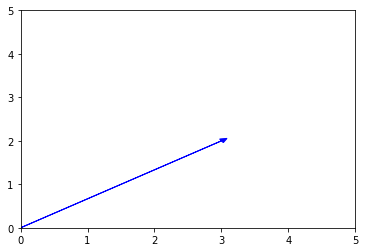

In [5]:
a = [3,2]
plt.arrow(0,0,a[0],a[1],head_width=.1, head_length=.1, color ='blue')

plt.xlim(0,5)          
plt.ylim(0,5)

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


- The norm of a vector  (||vector||) is its length.

In [7]:
b = [17, -4, -2, 1]
norm_b = sum([x**2 for x in b])**.5
norm_b

17.60681686165901

## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [8]:
c = [3, 7, -2, 12]
d = [9, -7, 4, 6]

c_dot_d = [(c[0]*d[0], c[1]*d[1], c[2]*d[2], c[3]*d[3])]
c_dot_d

[(27, -49, -8, 72)]

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [20]:
E = np.array([[7,4,2],[1,3,-1],[2,6,-4]])

E_Trans = np.array([[7,1,2],[4,3,6],[2,-1,-4]])

E_det = (7 *((3*-4) - (-1*6)) + 4*((-1*2) - (1*-4)) + 2*((1*6) - (3*2)))

E_inv = np.linalg.inv(E)

print(E_inv,'\n\n', E_Trans,'\n')

[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]] 

 [[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]] 



# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [31]:
customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [32]:
df.describe()

,customers,snow
count,7.000000,7.000000
mean,1135.714286,2.714286
std,314.264069,2.927700
min,760.000000,0.000000
25%,905.000000,0.500000
50%,1080.000000,1.000000
75%,1350.000000,5.000000
max,1600.000000,7.000000


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

Varaince between snow and customers are not comparable because they are measuring completely different things. We could as easily change snow units to milimeters and the variance would increase because the measurements are in larger numbers, but the number of customers would remain the same even if they are causally linked because the measurement does not effect the actual amount of snow.

In [41]:
df.var()

customers    98761.904762
snow             8.571429
dtype: float64

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [35]:
#making sure this is behaving like I expected
df.T.values

array([[ 820,  760, 1250,  990, 1080, 1450, 1600],
       [   0,    1,    7,    1,    0,    6,    4]])

In [40]:
# Use pandas variance covariance matrix function
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


In [42]:
# Numpy's var/cov matrix function. has more controll, sometimes one of these
# does not behave like it should, aways good to check them against eachother
np.cov(df.T)

array([[9.87619048e+04, 6.70238095e+02],
       [6.70238095e+02, 8.57142857e+00]])

In [43]:
# Show correlation
df.corr()

,customers,snow
customers,1.000000,0.728463
snow,0.728463,1.000000


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [49]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df1 = pd.DataFrame(data)

# Look at the data
df1.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [0]:
df2 = df1.drop('Country', axis=1)

In [51]:
df2means = df2.mean()
df2std = df2.std()
df2means

Cheese                  94.25
Carcass_Meat           245.25
Other_Meat             706.00
Fish                   130.50
Fats_and_Oils          205.25
Sugars                 154.25
Fresh_Potatoes         798.25
Fresh_Veg              208.00
Other_Veg              457.75
Processed_Potatoes     202.00
Processed_Veg          349.00
Fresh_Fruit            967.50
Cereals               1502.50
Beverages               57.50
Soft_Drinks           1427.00
Alcoholic Drinks       360.75
Confectionery           55.25
dtype: float64

In [0]:
cendf = (df2 - df2means.values) / df2std
covdf = cendf.T.cov()

In [54]:
covdf

,0,1,2,3
0,0.199633,0.058023,-0.031143,-0.226513
1,0.058023,0.625020,-0.273208,-0.409836
2,-0.031143,-0.273208,0.520300,-0.215948
3,-0.226513,-0.409836,-0.215948,0.852297


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(2)
pca.fit(df2)

df_evec = pd.DataFrame(pca.components_)

In [58]:
df_evec

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.056955,0.047928,-0.258917,-0.084415,-0.005194,-0.037621,0.401402,-0.15185,-0.243594,-0.026886,-0.036488,-0.632641,-0.047703,-0.026188,0.232244,-0.463968,-0.02965
1,0.016013,0.013916,-0.015331,-0.050755,-0.095389,-0.043022,-0.715017,-0.14490,-0.225451,0.042851,-0.045452,-0.177741,-0.212600,-0.030561,0.555124,0.113537,0.00595


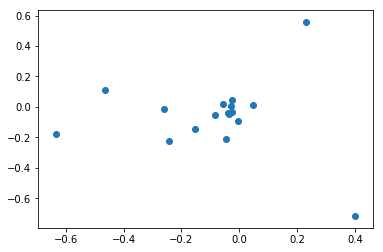

In [61]:
plt.scatter(df_evec.loc[0], df_evec.loc[1])

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [62]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


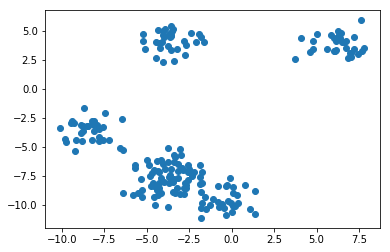

In [65]:
# Look at data to see if clusters number can be guessed.
# I am calling it 4, although if ther's time, I will try 5
# That bottom one could be either one or two

plt.scatter(points['x'], points['y'])

In [0]:
from sklearn.cluster import KMeans

In [0]:
#check using elbow method:

sum_of_squared_distances = []
K = range(1,8)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    sum_of_squared_distances.append(km.inertia_)

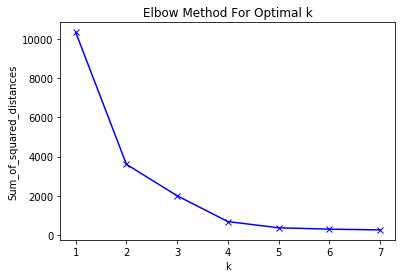

In [68]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [69]:
# Use scikit to make cluster lables for point pairs
kmeans = KMeans(n_clusters=4)
kmeans.fit(points)
labels = kmeans.labels_
print(labels)

[3 1 1 3 1 1 3 3 2 1 1 1 1 1 3 1 3 1 1 0 3 0 0 0 1 1 1 2 1 1 1 1 1 0 1 1 1
 1 2 1 1 0 2 2 2 1 1 1 3 1 0 3 3 2 0 1 1 2 2 3 0 1 3 2 0 2 0 2 3 2 1 1 1 1
 0 0 1 1 2 0 2 1 1 1 2 1 2 1 1 0 2 1 0 1 1 1 1 1 1 1 1 1 3 1 1 0 3 3 3 0 1
 0 1 3 1 1 2 2 0 2 0 1 1 3 1 3 1 0 2 3 1 3 1 3 2 2 1 0 3 1 2 1 1 0 1 2 1 2
 3 1 1 1 3 0 1 2 1 0 1 3 1 1 2 3 0 0 1 2 1 1 3 1 2 0 1 1 1 1 1 3 1 1 1 1 1
 1 3 0 2 1 1 3 0 3 1 2 0 0 1 1]


In [0]:
# Add cluster lables to our points dataframe
points['cluster_labels'] = pd.Series(labels)

In [82]:
# Make sure it worked
points.head()

,x,y,cluster_labels
0,-7.846803,-3.421277,3
1,-3.554323,-6.884729,1
2,-0.192822,-9.671030,1
3,-6.401456,-5.223972,3
4,-0.804026,-9.704457,1


In [83]:
#get_centr

centroid = points.groupby('cluster_labels').mean()

centroid

,x,y
cluster_labels,,
0,6.249793,3.844572
1,-2.733593,-8.204353
2,-3.597407,4.133441
3,-8.366530,-3.612381


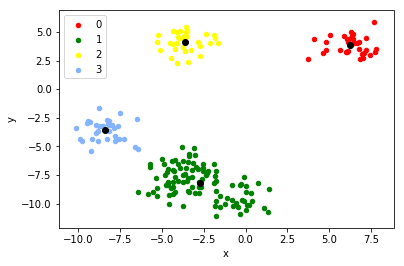

In [86]:
colors = {0:'red', 1:'green', 2:'yellow', 3:'#84b3ff'}
fig, ax = plt.subplots()
ax.plot(centroid.iloc[0].x, centroid.iloc[0].y, "ok")
ax.plot(centroid.iloc[1].x, centroid.iloc[1].y, "ok")
ax.plot(centroid.iloc[2].x, centroid.iloc[2].y, "ok")
ax.plot(centroid.iloc[3].x, centroid.iloc[3].y, "ok")

groups = points.groupby('cluster_labels')


for key, group in groups:
  group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()
